In [7]:
from sklearn.metrics import mean_absolute_error
from prophet import Prophet
import pandas as pd

price_weather_df = pd.read_csv('../../processed_data/price_weather_weekly_df-2016-2023.csv')

train_data = price_weather_df.iloc[:281]
test_data = price_weather_df.iloc[281:] 

# Prepare data for Prophet
prophet_data = train_data.reset_index().rename(columns={'dt': 'ds', 'Alface Crespa - Roça': 'y'})
prophet_data['ds'] = pd.to_datetime(prophet_data['ds']).dt.tz_localize(None)

# Fit Prophet model
model = Prophet()
model.fit(prophet_data)

# Forecasting
future = model.make_future_dataframe(periods=1, freq='M')
forecast = model.predict(future)

# Extract forecasted values
forecast_values = forecast[['ds', 'yhat']].tail(len(test_data))

# Evaluation
mae = mean_absolute_error(test_data['Alface Crespa - Roça'], forecast_values['yhat'])
print(f'Prophet MAE: {mae}')


16:10:16 - cmdstanpy - INFO - Chain [1] start processing
16:10:16 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAE: 0.305344124787647


/home/patrick/miniconda3/envs/time-series-analysis-2/lib/python3.11/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


<Axes: title={'center': 'Actual Prices for Alface Crespa - Roça'}, xlabel='dt'>

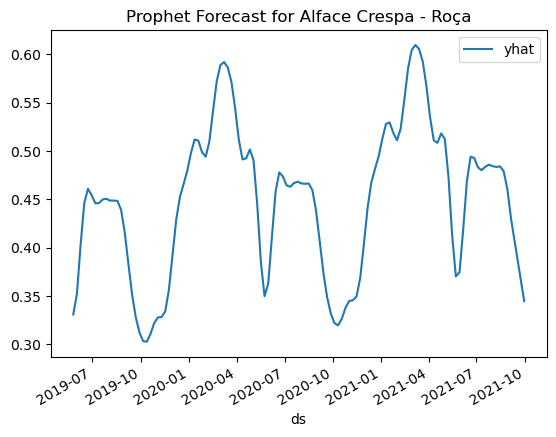

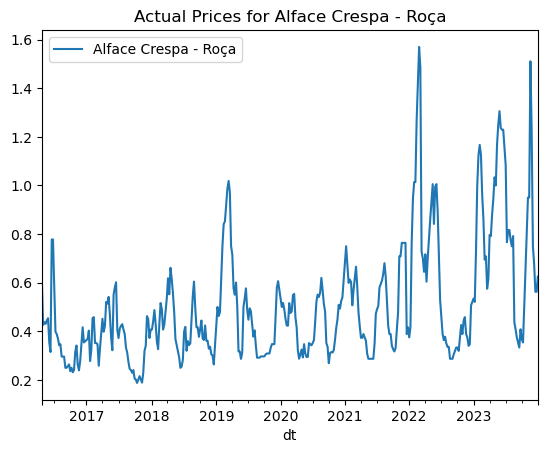

In [8]:
forecast_values[['ds', 'yhat']].plot(x='ds', y='yhat', title='Prophet Forecast for Alface Crespa - Roça')
price_weather_df.dt = pd.to_datetime(price_weather_df.dt).dt.tz_localize(None)
price_weather_df[['dt', 'Alface Crespa - Roça']].plot(x='dt', y='Alface Crespa - Roça', title='Actual Prices for Alface Crespa - Roça')

